In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('avocado.csv')

In [3]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The dataset can be seen in two angles to find the region and find the average price .
for classification--"region"
for regression --"AveragePrice"

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# DATA PREPROCESSING¶

In [6]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
##checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values present and all data types are correct

In [8]:
#dropping the unwanted columns
df=df.drop('Unnamed: 0' ,axis=1)

In [9]:
df.shape

(18249, 13)

In [10]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['Date', 'type', 'region']


Numerical columns:   ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']




In [11]:
#checking the list of counts of target
df.nunique().to_frame("no of unique values")

,no of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [12]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [115]:
#replacing the type column values
df=df.replace(["conventional", "organic"],
           ["0","1"])

In [13]:
#checking the mean price of avocado every year
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

in year 2017 the average price is high when compared to 2015,2016 &2018

In [14]:
#checking the which type of avocado is sell in last years
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: count, dtype: int64

In [15]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
df["region"].nunique()

54

In [17]:
#Statastical measures of dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1)In the most of the columns mean and median are close to each other.
2)most of columns mean is greater than std.
3)there is huge difference in 75% to max means are outliers in most of columns.

# DATA VISULIZATION

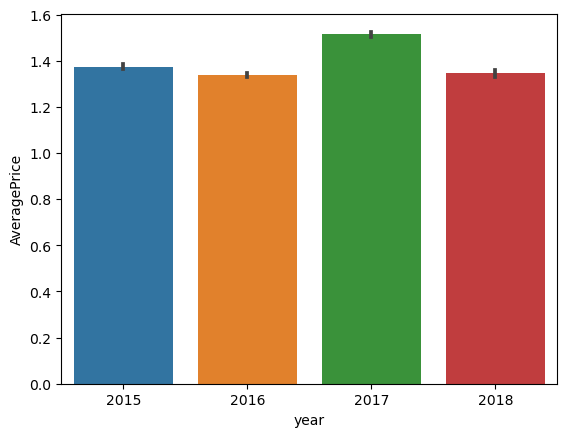

In [18]:
#comparing fyear vs AveragePrice
sns.barplot(x='year', y='AveragePrice', data=df)
plt.show()

n year 2017 the average price is high when compared to 2015,2016 &2018

Detecting outliers

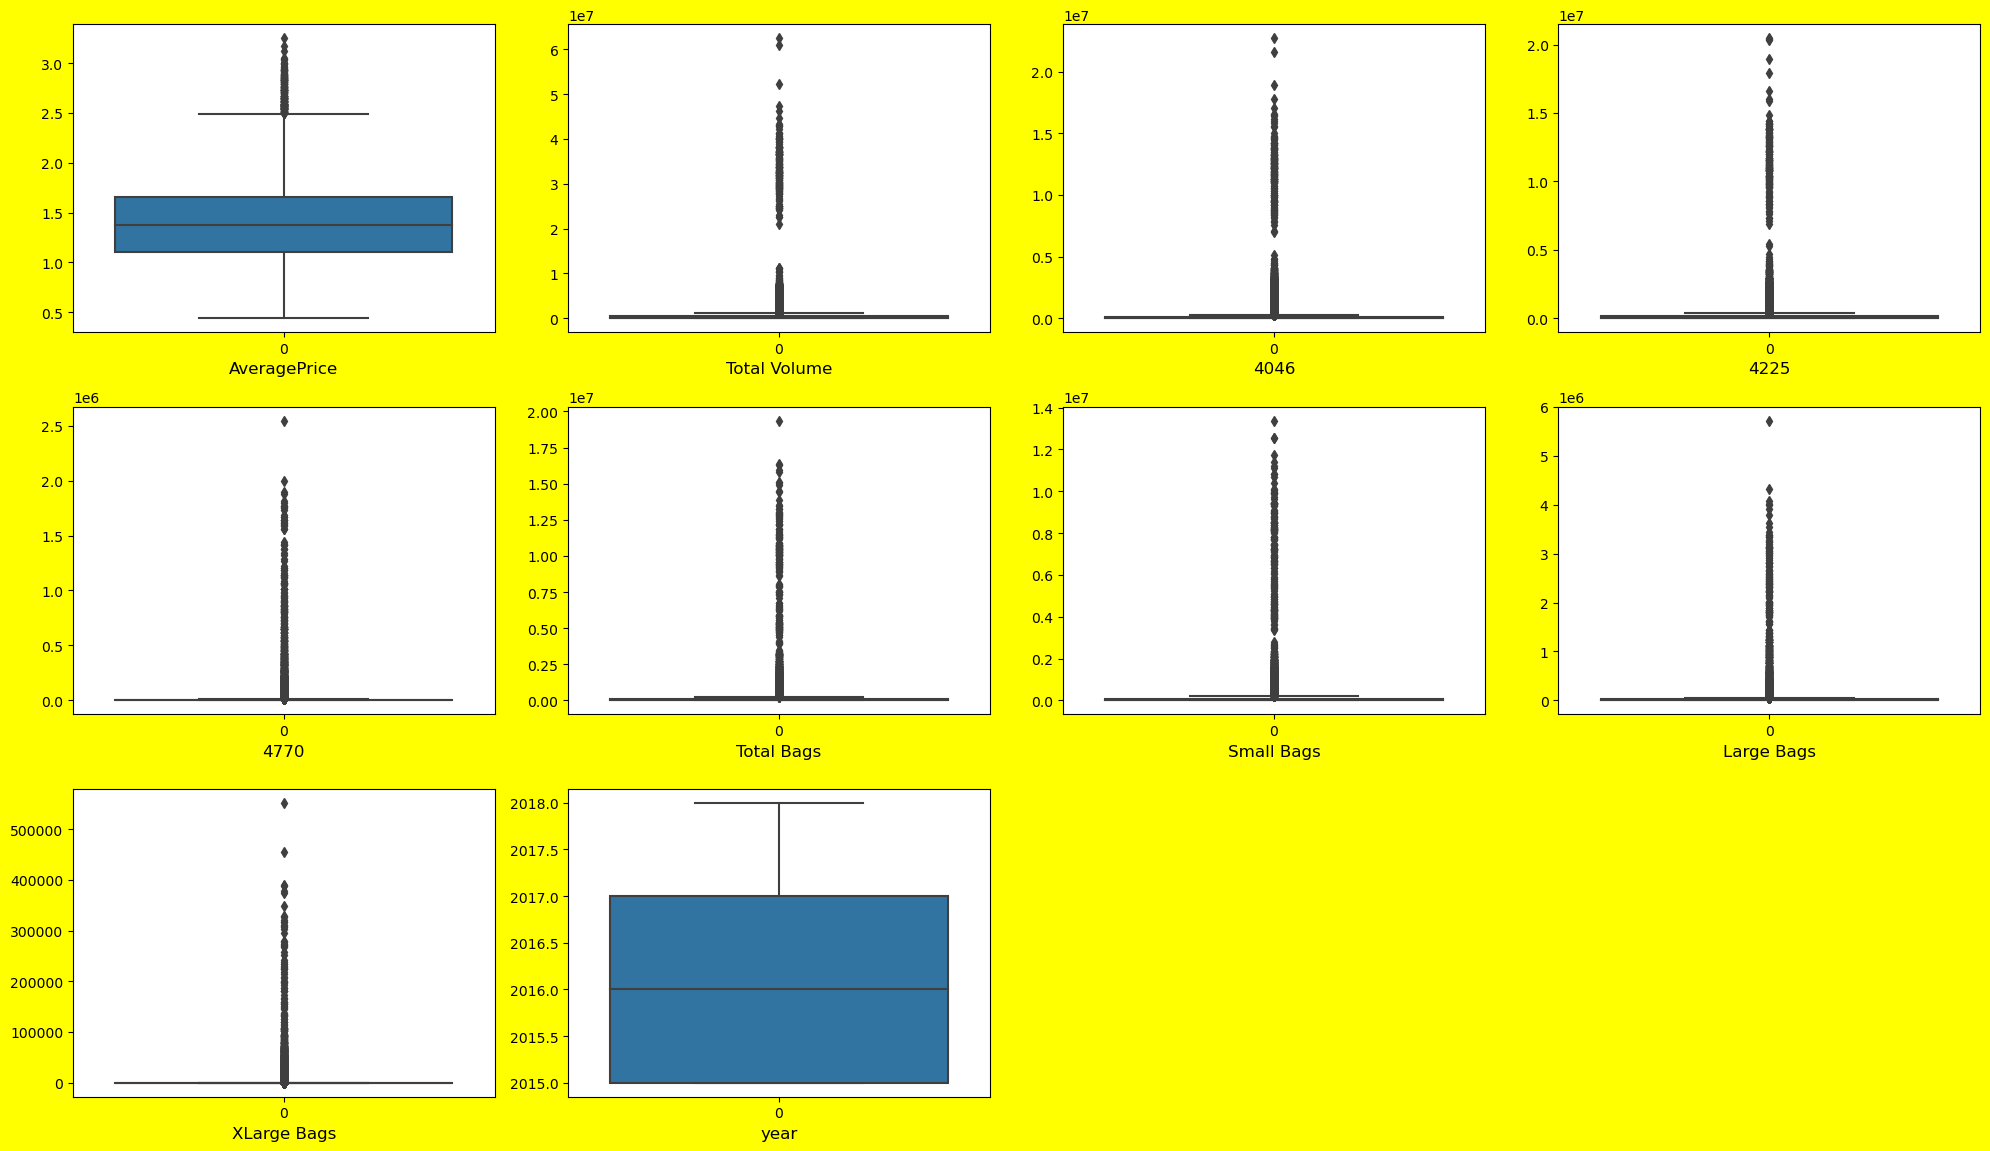

In [19]:
plt.figure(figsize=(20,15), facecolor= "yellow")
plotnumber = 1#iteration or index value
for col in Numerical_col:
    if plotnumber<=13:
        ax=plt.subplot(4,4, plotnumber)#subplot is used to plot diff plot on single image
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

 in most of columns there are huge outliers in total volume,4046,4225,4770,total bags,smallbags,large bags,xlarge bage

In [20]:
from scipy.stats import zscore
out_col=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_col))
z 

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [21]:
#threesold=2
np.where(z>2)

(array([  313,   324,   326, ...,  9113,  9113, 17487], dtype=int64),
 array([3, 2, 3, ..., 4, 6, 6], dtype=int64))

In [22]:
z.iloc[337,1]

2.5994149653795113

In [23]:
#removoing the dataabove zscore and creating new df
df1=df[(z<2).all(axis=1)]
df1.shape

(17334, 13)

In [24]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 18249
new data frame.-- 17334


In [25]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 5.0139733684037475


the data loss is less than 10% we can delete the outliers

In [26]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [27]:
df=df1

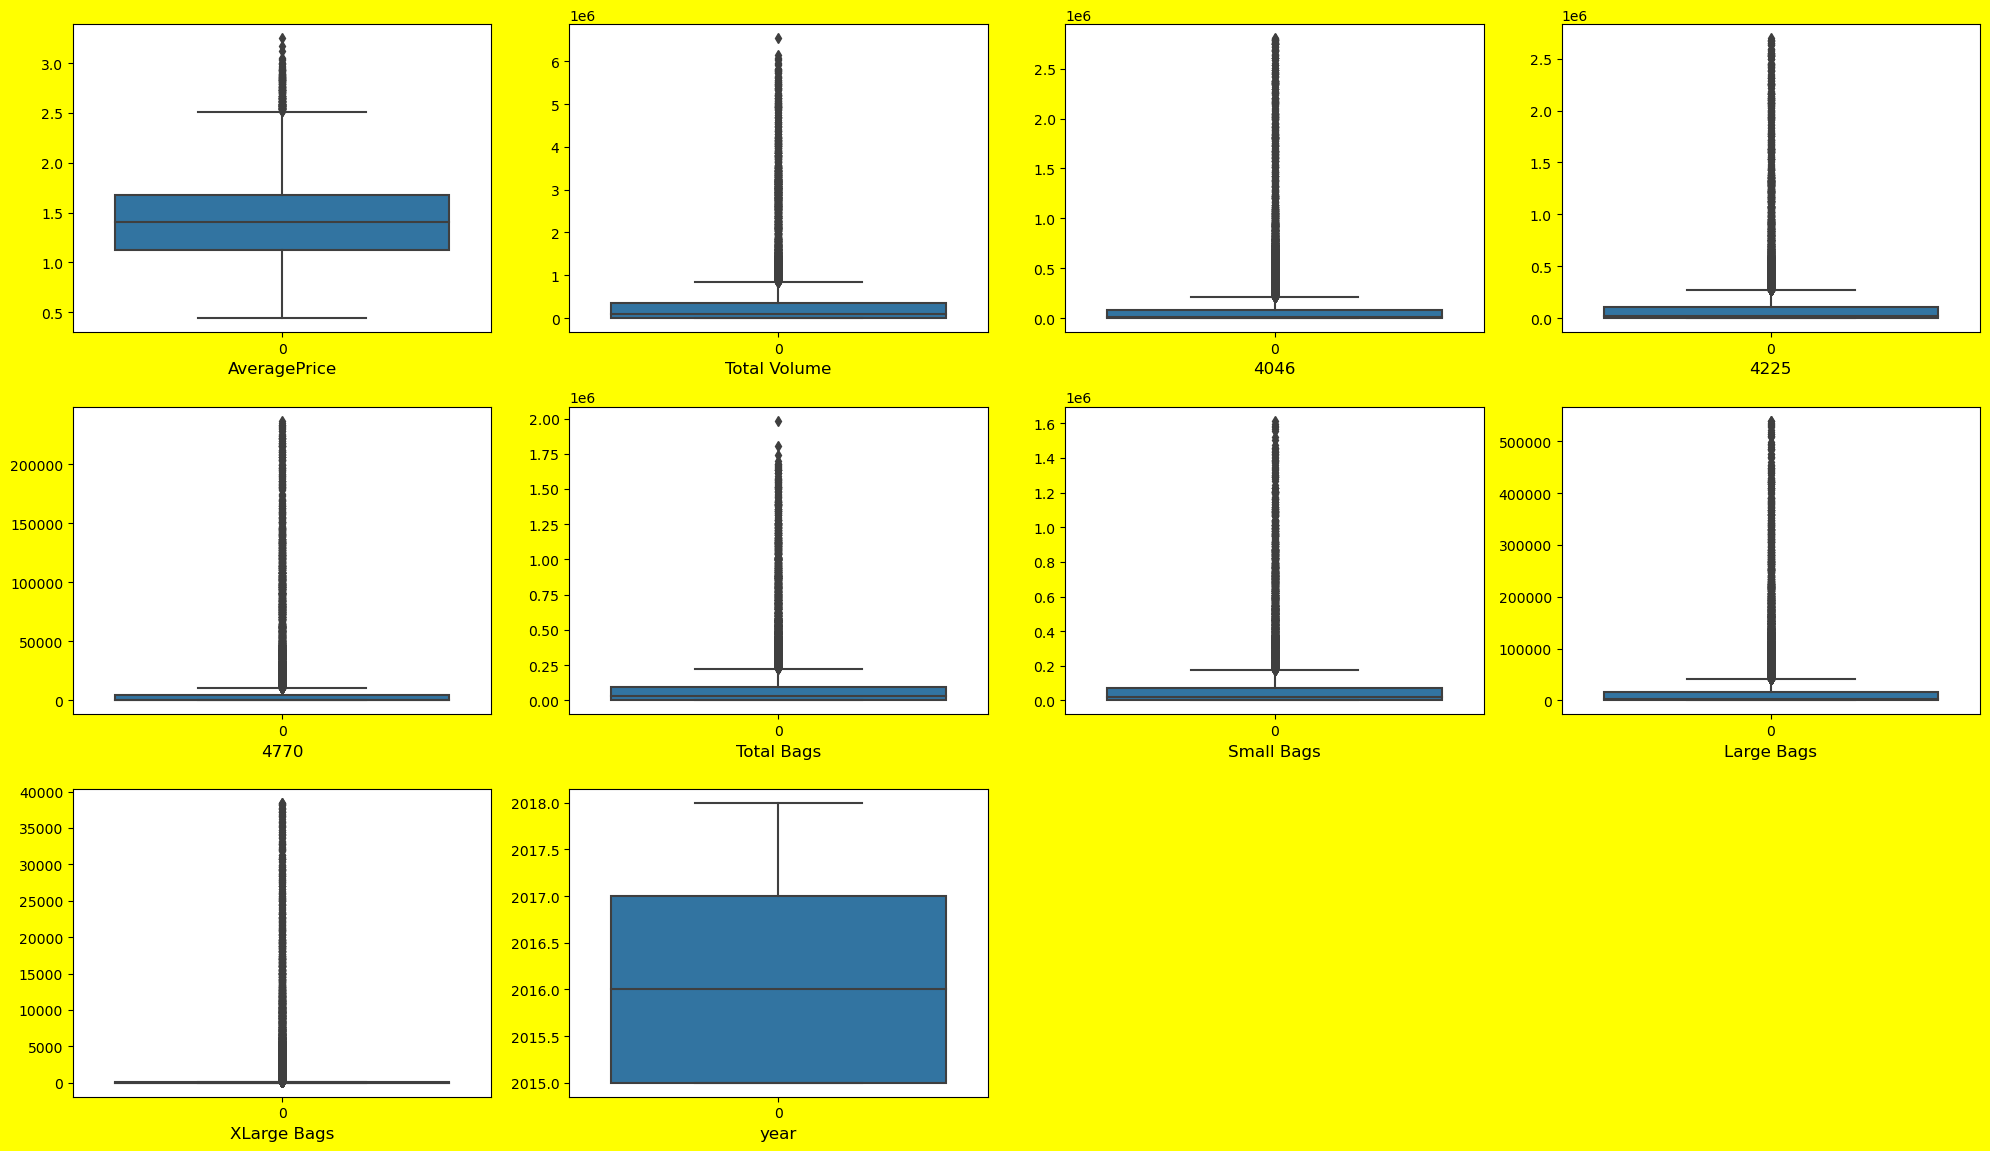

In [28]:
plt.figure(figsize=(20,15), facecolor= "yellow")
plotnumber = 1#iteration or index value
for col in Numerical_col:
    if plotnumber<=13:
        ax=plt.subplot(4,4, plotnumber)#subplot is used to plot diff plot on single image
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

after deleting the outlier data also there is more outliers

In [29]:
#dropping the date column
df=df.drop('Date' ,axis=1)

# ENCODING

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= LE.fit_transform(df[i].values.reshape(-1,1))
df   

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Finding the correlation between the target variable and independent variable if there is any multicolinearity

In [31]:
#check the corr
cor = df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.329705,-0.335657,-0.233982,-0.237109,-0.292094,-0.261095,-0.278839,-0.149042,0.602117,0.098854,0.018289
Total Volume,-0.329705,1.000000,0.858985,0.871267,0.591259,0.908043,0.894425,0.616930,0.466285,-0.445847,-0.002410,0.062086
4046,-0.335657,0.858985,1.000000,0.536115,0.439580,0.700942,0.666830,0.545348,0.392212,-0.368755,-0.038940,0.105314
4225,-0.233982,0.871267,0.536115,1.000000,0.575772,0.756197,0.775551,0.424293,0.339624,-0.404309,-0.033894,-0.002111
4770,-0.237109,0.591259,0.439580,0.575772,1.000000,0.471887,0.487441,0.240170,0.429218,-0.336576,-0.096141,-0.098972
Total Bags,-0.292094,0.908043,0.700942,0.756197,0.471887,1.000000,0.973573,0.714004,0.511838,-0.394417,0.109663,0.075870
Small Bags,-0.261095,0.894425,0.666830,0.775551,0.487441,0.973573,1.000000,0.535737,0.529189,-0.379355,0.088973,0.061415
Large Bags,-0.278839,0.616930,0.545348,0.424293,0.240170,0.714004,0.535737,1.000000,0.224351,-0.290687,0.129996,0.097119
XLarge Bags,-0.149042,0.466285,0.392212,0.339624,0.429218,0.511838,0.529189,0.224351,1.000000,-0.277754,0.086889,-0.043919
type,0.602117,-0.445847,-0.368755,-0.404309,-0.336576,-0.394417,-0.379355,-0.290687,-0.277754,1.000000,0.007807,0.028559


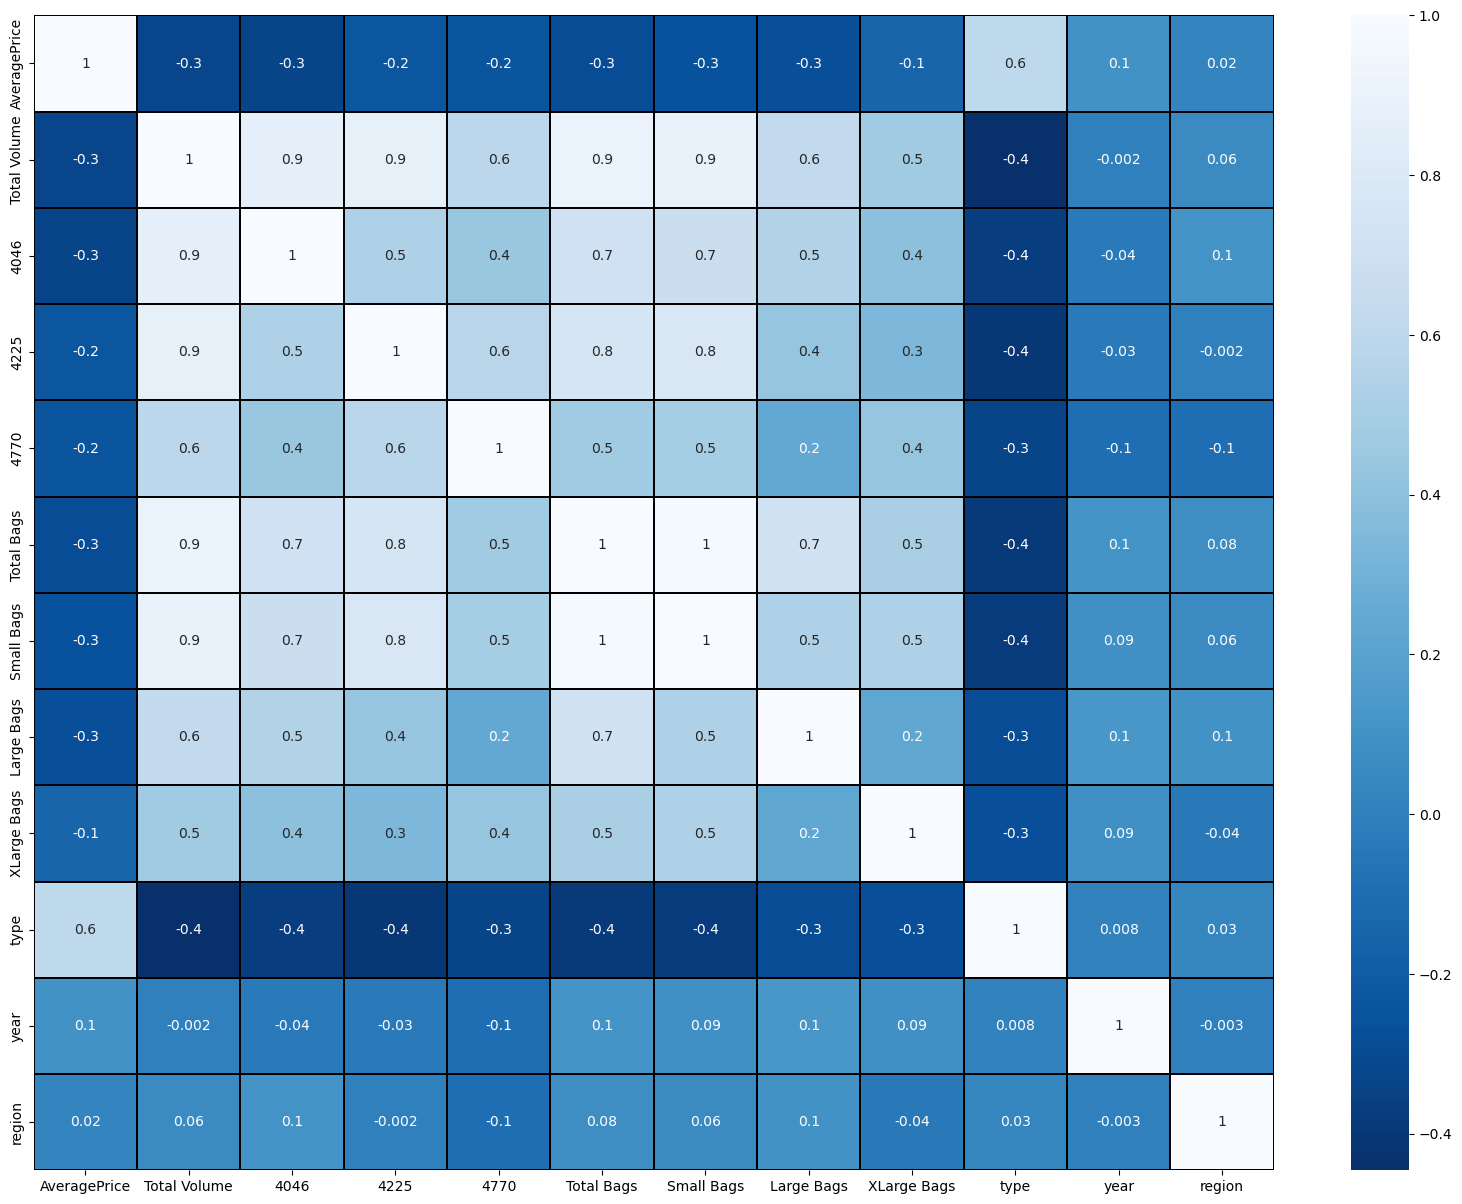

In [32]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

FROM THE ABOVE HEATMAP WE CAN OBSERVE THERE ARE SOME COLUMNS ARE HIGHLY CORRELATED
1)TOATL volume is highly  positively correlated with largebags,smallbags,total bags,c,4046.
2)4046 is highly  positively correlated smallbags,total bags and total volume.
3)4225 is highly  positively correlated with smallbags,total bags and total volume.
4)Total bags is positively correlated with large bags,and total volume
5)small bags is highly  positively correlated with total bags, total volume,4225,4770.

we can drop some columns after checking vif values

In [33]:
#checking skewness
df.skew()

AveragePrice    0.545424
Total Volume    3.993739
4046            5.074195
4225            4.735698
4770            5.079635
Total Bags      3.990209
Small Bags      4.281543
Large Bags      4.548163
XLarge Bags     6.160207
type           -0.105150
year            0.221246
region          0.005995
dtype: float64

In [34]:
#removing skewness using cuberoot method the acceptable range is -0.5 to +0.5
df["Total Volume"]=np.cbrt(df["Total Volume"])
df["4046"]=np.cbrt(df["4046"])
df["4225"]=np.cbrt(df["4225"])
df["4770"]=np.cbrt(df["4770"])
df["Total Bags"]=np.cbrt(df["Total Bags"])
df["Small Bags"]=np.cbrt(df["Small Bags"])
df["Large Bags"]=np.cbrt(df["Large Bags"])
df["XLarge Bags"]=np.cbrt(df["XLarge Bags"])

In [35]:
df.skew()

AveragePrice    0.545424
Total Volume    1.064278
4046            1.400149
4225            1.137322
4770            1.571393
Total Bags      1.060480
Small Bags      1.081092
Large Bags      1.176615
XLarge Bags     2.249820
type           -0.105150
year            0.221246
region          0.005995
dtype: float64

after reducing skewness also there is skew in some columns we can check vif and drop the columns

In [36]:
#Seperating the label and features¶
x_r=df.drop('AveragePrice', axis=1)
y_r=df["AveragePrice"]

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_r=pd.DataFrame(scaler.fit_transform(x_r),columns=x_r.columns)
x_r

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x_r.values,i) for i in range(len(x_r.columns))]
vif["Features"]=x_r.columns
vif

,VIF values,Features
0,548.160136,Total Volume
1,45.843143,4046
2,93.232024,4225
3,4.729358,4770
4,347.465579,Total Bags
5,169.585583,Small Bags
6,18.094651,Large Bags
7,2.151923,XLarge Bags
8,5.084191,type
9,17.408322,year


total volume,4225,Total Bags,Small Bags,Large Bags,year has high vif valaues we can drop total volume column it has has vif and correlated to target 

In [39]:
x_r=df.drop(columns=['Total Volume','Total Bags','AveragePrice'], axis=1)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x_r.values,i) for i in range(len(x_r.columns))]
vif["Features"]=x_r.columns
vif

,VIF values,Features
0,7.878646,4046
1,12.614722,4225
2,4.661064,4770
3,15.442746,Small Bags
4,3.999333,Large Bags
5,2.124330,XLarge Bags
6,5.031847,type
7,14.574303,year
8,4.177691,region


# DATA MODELLING--REGRESSION

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [42]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r,y_r, test_size=0.30, random_state=80)

In [43]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR()]

In [44]:
def r2score_train_test():
    
    for model in models:
        model.fit(xr_train,yr_train)
        yr_train_pred = model.predict(xr_train)
        yr_test_pred =model.predict(xr_test)
        
        
    
        print(model)
        print('r2 Score for the training',  '=', r2_score(yr_train,yr_train_pred)*100)
        print('r2 Score for the testing', '=',  r2_score(yr_test,yr_test_pred)*100)
        print('Mean Absolute Error:',  '=',  mean_absolute_error(yr_test,yr_test_pred))
        print('Mean squared Error:', '=',  mean_squared_error(yr_test,yr_test_pred))
        print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(yr_test,yr_test_pred))) 
        print('-'*30)  
        print("\n")
              

In [45]:
r2score_train_test()

LinearRegression()
r2 Score for the training = 44.46827532515749
r2 Score for the testing = 46.27914824136645
Mean Absolute Error: = 0.2280080807230285
Mean squared Error: = 0.08751737156086693
Root Mean square Error: = 0.29583335099489194
------------------------------


DecisionTreeRegressor()
r2 Score for the training = 100.0
r2 Score for the testing = 67.14062976956778
Mean Absolute Error: = 0.1518842530282638
Mean squared Error: = 0.05353164776004614
Root Mean square Error: = 0.23136907260921055
------------------------------


KNeighborsRegressor()
r2 Score for the training = 88.74137409373908
r2 Score for the testing = 83.83590779136195
Mean Absolute Error: = 0.11205191309363585
Mean squared Error: = 0.02633314285714286
Root Mean square Error: = 0.1622748990359965
------------------------------


RandomForestRegressor()
r2 Score for the training = 97.64057259466047
r2 Score for the testing = 84.08966603799416
Mean Absolute Error: = 0.11276710248029223
Mean squared Error: = 0.025

from the above models knn model gives the best r2 score when compare tom others models thwe difference between them training and testing is  low .. MAE,MSE,RMSE is low

In [46]:
from sklearn.model_selection import cross_val_score

compare_models_cross_validation()

cross validation score very low when compared to model accuracy

#difference between models and cross validation score
print("Diff between r2_score and cross_validation score  for LinearRegression is =",  99.60 -99.37)
print("Diff between r2_score and cross_validation score  for DecisionTreeRegressor is =",   87.13 -81.60)
print("Diff between r2_score and cross_validation score  for KNeighborsRegressor is =",  96.41 -96.37)
print("Diff between r2_score and cross_validation score  for RandomForestRegressor is =",  96.48 -94.76)
print("Diff between r2_score and cross_validation score  for GradientBoostingRegressor is =",  97.69-96.37)
print("Diff between r2_score and cross_validation score  for SVR is =", 97.90 -97.04)

# HYPER PARAMETER TUNING

In [48]:
from sklearn.model_selection import GridSearchCV

parameters ={
             'n_neighbors': [1,15,30],
              'weights' :['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[20,30,40],
              'p':[float,2],
               'metric':['str' ,'minkowski'],
               'n_jobs':[-1]
             }

In [49]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [50]:
GCV.fit(xr_train,yr_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['str', 'minkowski'], 'n_jobs': [-1],
                         'n_neighbors': [1, 15, 30], 'p': [<class 'float'>, 2],
                         'weights': ['uniform', 'distance']})

In [51]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'distance'}

In [52]:
best_model = KNN(weights='distance',p=2,n_neighbors=15,n_jobs=-1,metric='minkowski',leaf_size=20,algorithm='auto')
best_model.fit(xr_train,yr_train)
yr_train_pred = best_model.predict(xr_train)
yr_test_pred =best_model.predict(xr_test)
print(r2_score(yr_test,yr_test_pred)*100)

81.36664470709096


the r2 reduces we can change the paramaters and try again

In [53]:
best_model = KNN(weights='distance',p=2,n_neighbors=25,n_jobs=-1,metric='minkowski',leaf_size=10,algorithm='auto')
best_model.fit(xr_train,yr_train)
yr_train_pred = best_model.predict(xr_train)
yr_test_pred =best_model.predict(xr_test)
print(r2_score(yr_test,yr_test_pred)*100)

78.81554032772556


# DATA MODELLING--CLASSIFICATION

In [54]:
#Seperating the label and features
x_c=df.drop('region', axis=1)
y_c=df["region"]

In [55]:
print(x_c.shape)
print(y_c.shape)

(17334, 11)
(17334,)


TRAIN TEST SPLIT- Dividing the data into train test split

In [64]:
xc_train, xc_test, yc_train, yc_test = train_test_split(x_c,y_c, test_size=0.25, random_state=75)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,recall_score ,classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC

In [66]:
models=[DecisionTreeClassifier(),
        BaggingClassifier(),SVC(),KNC(),RandomForestClassifier() ]

In [67]:
def accuracyscore_train_test():
    
    for model in models:
        model.fit(xc_train,yc_train)
        yc_train_pred = model.predict(xc_train)
        yc_test_pred =model.predict(xc_test)
        
        print("Model performance for Training set")
        print(model)
        print('accuracyscore :',  '=',accuracy_score(yc_train,yc_train_pred)*100)
       
        print("Model performance for Testing set")
        print('accuracyscore :',  '=',accuracy_score(yc_test,yc_test_pred)*100)
       
        print("\n")
              

In [68]:
accuracyscore_train_test()

Model performance for Training set
DecisionTreeClassifier()
accuracyscore : = 100.0
Model performance for Testing set
accuracyscore : = 79.74157821873558


Model performance for Training set
BaggingClassifier()
accuracyscore : = 99.46153846153845
Model performance for Testing set
accuracyscore : = 85.48684817720351


Model performance for Training set
SVC()
accuracyscore : = 4.369230769230769
Model performance for Testing set
accuracyscore : = 3.6686663590216892


Model performance for Training set
KNeighborsClassifier()
accuracyscore : = 89.4
Model performance for Testing set
accuracyscore : = 83.94093216428243


Model performance for Training set
RandomForestClassifier()
accuracyscore : = 100.0
Model performance for Testing set
accuracyscore : = 90.26303645592986




from the above models knc,randomforest model gives the best accuracy score when compare tom others models thwe difference between them training and testing is  low .. accuracy is 83.94 & 90.. by checking cross validation we can conform

In [71]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x_c, y_c, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [72]:
compare_models_cross_validation()

Cross Validation Score for the DecisionTreeClassifier() = [0.46726276 0.66628209 0.62763196 0.5289876  0.415176  ]
Mean Accuracy  of the DecisionTreeClassifier() = 54.1068080530452 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.5494664  0.73665994 0.69224113 0.60744159 0.45729948]
Mean Accuracy  of the BaggingClassifier() = 60.86217074981637 %
------------------------------


Cross Validation Score for the SVC() = [0.09201038 0.12633401 0.0426882  0.01932506 0.01933064]
Mean Accuracy  of the SVC() = 5.993765968505958 %
------------------------------


Cross Validation Score for the KNeighborsClassifier() = [0.58263628 0.71733487 0.65791751 0.56331122 0.4221004 ]
Mean Accuracy  of the KNeighborsClassifier() = 58.86600577100619 %
------------------------------


Cross Validation Score for the RandomForestClassifier() = [0.59503894 0.81944044 0.74214018 0.68560715 0.48701673]
Mean Accuracy  of the RandomForestClassifier() = 66.58486885915194 %
-

In [77]:
#difference between models and cross validation score
print("Diff between Accuracy score and cross_validation score  for Decision tree classifier is =",  79.74 -54.10)
print("Diff between Accuracy score and cross_validation score  for BaggingClassifier is =",  85.48 -60.86)
print("Diff between Accuracy score and cross_validation score  for RandomForestClassifier is =",  90.26 -66.58)
print("Diff between Accuracy score and cross_validation score  for KNC is =", 83.94 -58.86)
print("Diff between Accuracy score and cross_validation score  for support vector machine is =", 3.66 -5.99)

Diff between Accuracy score and cross_validation score  for Decision tree classifier is = 25.639999999999993
Diff between Accuracy score and cross_validation score  for BaggingClassifier is = 24.620000000000005
Diff between Accuracy score and cross_validation score  for RandomForestClassifier is = 23.680000000000007
Diff between Accuracy score and cross_validation score  for KNC is = 25.08
Diff between Accuracy score and cross_validation score  for support vector machine is = -2.33


the diffrence between accuracy and croosvalidation score is less in randomforestclassifier 
the best model is random forest

# HYPER PARAMETER TUNING

In [78]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters ={
             'criterion': ['gini','entropy'],
             'max_depth' : [1,5,10],
             'random_state':[20,40],
             'min_samples_split':[1,2,3],
             'oob_score':[True,False]
             }

In [86]:
RFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [89]:
RFC.fit(xc_train,yc_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'min_samples_split': [1, 2, 3],
                         'oob_score': [True, False], 'random_state': [20, 40]})

In [90]:
RFC.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'oob_score': True,
 'random_state': 20}

In [91]:
final_model=RandomForestClassifier(criterion = 'entropy',max_depth=10, oob_score=True, random_state=20, min_samples_split = 2)
final_model.fit(xc_train,yc_train)
pred=final_model.predict(xc_test)
acc= accuracy_score(yc_test,pred)
print(acc*100)

85.48684817720351


In [92]:
final_model2=RandomForestClassifier(criterion = 'gini',max_depth=20, oob_score=True, random_state=40, min_samples_split = 1)
final_model.fit(xc_train,yc_train)
pred=final_model.predict(xc_test)
acc= accuracy_score(yc_test,pred)
print(acc*100)

85.48684817720351


BY PERFORMING HYPERPARAMETER TUNING USING GIRDSEARCHCV there is a increase in ACCURACY_SCORE from 90.01 to 85.4.

PLOTTING ROC AND compare AUC FOR ALL MODELS

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
fpr,tpr, thresholds=metrics.roc_curve(yc_test, pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=final_model)
display.plot()

classification has highest accuracy than r2score

In [95]:
#saving model using .pkl
import joblib
joblib.dump(final_model,"avocada-region.pkl")

['avocada-region.pkl']